# Using Pandas

This is the first part of a two part introduction to the way we'll use `Pandas`` in this class.

`Pandas` is another library for Python with tools for handling and operating on data.  It particularly excels at the type of data we might usually expect to find in flat text files, CSV files, and Excel spreadsheets.  It also has a powerful data structure called a `DataFrame` that streamlines the process of data handling and manipulation and time series analysis.  

This notebook introduces you to some of the main functionality of `Pandas`.  The first thing we'll do is import the `Pandas` library, following standard Python conventions:

In [1]:
import pandas as pd
import numpy as np # let's also get NumPy, since we often need it
import matplotlib as mpl
import matplotlib.pyplot as plt

## Reading in data

One of the first things we'll use `Pandas` for in this class is to read data into our notebooks.  `Pandas` provides simple input functions for CSV, Excel, HTML, and [many others](https://pandas.pydata.org/docs/user_guide/io.html).  I've provides a very simple Excel file and CSV file in the directory where this notebook resides.  Note that if you need to see the contents of your current directory, you can make an external system call and `!ls`.  

In [2]:
!ls # using '!' makes a call out of the notebook into your system (terminal), where `ls` lists the files in your directory

BoulderCreekDischarge.csv               introduction_to_python.ipynb
HadISST_sst.nc                          introduction_to_xarray.ipynb
cereal_production_WB_FAO_2022.xlsx      loops_in_python.ipynb
introduction_to_matplotlib_part_1.ipynb missing_data.ipynb
introduction_to_matplotlib_part_2.ipynb myData.csv
introduction_to_numpy.ipynb             mySimpleExcelFile.xls
introduction_to_pandas_part_1.ipynb     random_arrays.ipynb


Alternatively, you can use [the `os` library](https://docs.python.org/3/library/os.html), which contains Python methods for accessing information from your operating system, including things like directory listings:

In [3]:
import os
os.listdir(os.curdir)


['introduction_to_python.ipynb',
 'HadISST_sst.nc',
 'introduction_to_xarray.ipynb',
 'introduction_to_matplotlib_part_2.ipynb',
 '.DS_Store',
 'cereal_production_WB_FAO_2022.xlsx',
 'introduction_to_matplotlib_part_1.ipynb',
 'introduction_to_numpy.ipynb',
 'introduction_to_pandas_part_1.ipynb',
 'BoulderCreekDischarge.csv',
 'random_arrays.ipynb',
 'missing_data.ipynb',
 'myData.csv',
 'loops_in_python.ipynb',
 'mySimpleExcelFile.xls']

OK, let's use `Pandas` and read in some data.  You can see the full description of [`pd.read_excel` here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html), and [`pd.read_csv` here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Note that `pd.read_excel` might give you a non-fatal (informational) warning if you are using the more modern `.xlsx` suffix. 

In [4]:
excel_data = pd.read_excel('mySimpleExcelFile.xls') 
text_data = pd.read_csv('myData.csv')

Let's take a look at our Excel data, first.  If we ask Python what type of variable `excel_data` is, it tells us it is a DataFrame from `Pandas`.

In [5]:
type(excel_data)

pandas.core.frame.DataFrame

We can look at this DataFrame simply by typing the variable name on its own line:

In [6]:
excel_data

,position,score,accuracy
0,1,43,3
1,2,21,6
2,3,39,4
3,4,11,2
4,5,47,3


You'll note a few things.  First, the print to screen is formatted nicely - for the DataFrame type, this is the default display behavior - nicer than most of what we've seen thus far in Python.  Similar to Excel, we see that the columns have labels.  Each row of numeric data also has an index value, starting from 0. 

You can use the method `.dtypes` to look at what data types each column is:

In [7]:
excel_data.dtypes


position    int64
score       int64
accuracy    int64
dtype: object

## Viewing DataFrames

For large datasets, you might want to only look at the top or bottom of the DataFrame, which can be accomplished with `.head()` and `.tail()` methods.  Of course, for our very tiny example dataset, it won't make much of a difference:

In [8]:
excel_data.head()


,position,score,accuracy
0,1,43,3
1,2,21,6
2,3,39,4
3,4,11,2
4,5,47,3


In [9]:
excel_data.tail()


,position,score,accuracy
0,1,43,3
1,2,21,6
2,3,39,4
3,4,11,2
4,5,47,3


We can also look just at the names of the columns, by calling the `.columns` method on the DataFrame:

In [10]:
excel_data.columns

Index(['position', 'score', 'accuracy'], dtype='object')

We can also look at the _index_ values -- we can think of these as row numbers, like we designate row numbers in Excel.  Of course, by default, here in Python these start with zero:

In [11]:
excel_data.index # printing this will show the starting value, the last value, and the step distance between them

RangeIndex(start=0, stop=5, step=1)

Calling the `.describe()` method on our DataFrame gives us some summary statistics by column - we can see the number of values, their mean, standard deviation, min, max, and some quantiles.  This can be useful as a check that we have brought in the data correctly:

In [12]:
excel_data.describe()


,position,score,accuracy
count,5.000000,5.000000,5.000000
mean,3.000000,32.200000,3.600000
std,1.581139,15.466092,1.516575
min,1.000000,11.000000,2.000000
25%,2.000000,21.000000,3.000000
50%,3.000000,39.000000,3.000000
75%,4.000000,43.000000,4.000000
max,5.000000,47.000000,6.000000


## Manipulating DataFrames

One of the strengths of Pandas is that it provides us lots of tools we can use to manipulate and manage our tabular data.  Like in NumPy, one thing we can do is transpose the rows and columns. 

In [13]:
excel_data.T

,0,1,2,3,4
position,1,2,3,4,5
score,43,21,39,11,47
accuracy,3,6,4,2,3


We can also sort using our index values (the row numbers) using `.sort_index`, and specifying ascending or descending and which axis to sort along:

In [14]:
excel_data.sort_index(axis=0,ascending=False)

,position,score,accuracy
4,5,47,3
3,4,11,2
2,3,39,4
1,2,21,6
0,1,43,3


We can also sort by the values in the DataFrame, and specify which column to use (similar to how we might do in Excel) to do this sorting.  Here, for example, we sort by the values in the column "score" and the default is to sort from low to high.  Notice how the rest of the DataFrame is sorted accordingly, too.  You can see this most clearly in how the index values are no longer in numerical order: 

In [15]:
excel_data.sort_values(by="score")

,position,score,accuracy
3,4,11,2
1,2,21,6
2,3,39,4
0,1,43,3
4,5,47,3


These are only a few of the ways you can sort or change the orientation or position of your DataFrame data.  We'll encounter others later in the class. 

## Indexing and Selecting Data

Pandas [provides powerful ways to index and select sets and subsets of your data(https://pandas.pydata.org/docs/user_guide/indexing.html).  Here are a few.

First, we can refer to columns by their names, and use this to operate on the columns, extract them out to other variables (Panda series, etc.).  For instance, we could pull the 'accuracy' column out of our DataFrame and assign it to it's own Pandas series called 'accuracy':

In [16]:
excel_data["accuracy"]
accuracy = excel_data["accuracy"] # if you look, this is now a Pandas Series of length 5

We can also refer to the _rows_ by their index values - for instance, here we look at the first two rows (following Pythonic indexing logic):

In [17]:
excel_data[0:2] # get rows using Python counting logic

,position,score,accuracy
0,1,43,3
1,2,21,6


The `.loc[]` method also allows us to refer to rows _or_ columns of our DataFrame:

In [18]:
excel_data.loc[0:2,:] # get rows by their location (index, in this case)

,position,score,accuracy
0,1,43,3
1,2,21,6
2,3,39,4


In [19]:
excel_data.loc[:,["position","accuracy"]] # get columns by location, using names

,position,accuracy
0,1,3
1,2,6
2,3,4
3,4,2
4,5,3


In [20]:
excel_data.loc[1:3,["accuracy","score"]] # get columns and rows by location, using names

,accuracy,score
1,6,21
2,4,39
3,2,11


A variant on `.loc[]` is `.iloc[]` which allows us to refer to columns and rows by their position or numerical location, e.g. 'the 1st column'

In [21]:
excel_data.iloc[:,1] # this selects column 1, which is the "score" column

0    43
1    21
2    39
3    11
4    47
Name: score, dtype: int64

... or 'the first row':

In [22]:
excel_data.iloc[1,:] # this selects by the position of index value 1

position     2
score       21
accuracy     6
Name: 1, dtype: int64

We can also slice and dice our DataFrame based on its internal characteristics.  For instance, the code below selects only the rows of the DataFrame where the value in the "accuracy" column is less than or equal to 3:

In [23]:
excel_data[excel_data["accuracy"]<=3] # get the DataFrame only where accuracy is <= 3

,position,score,accuracy
0,1,43,3
3,4,11,2
4,5,47,3


We can also readily add data to our DataFrame - here I add another column of data, call it 'velocity' and specify the strings it contains.  Note how the DataFrame allows us to mix numeric and string data types in this way as well:

In [24]:
excel_data["velocity"] = ["fast", "slow", "medium", "slow", "medium"]
excel_data

,position,score,accuracy,velocity
0,1,43,3,fast
1,2,21,6,slow
2,3,39,4,medium
3,4,11,2,slow
4,5,47,3,medium


One very nice feature of Pandas is that it provides us with a host of tools for dealing with missing data (NaN).  

You can see more of the ways of working with missing data in Pandas here: https://pandas.pydata.org/docs/user_guide/missing_data.html

Let's add a missing data point into our current DataFrame, replacing the value of '39' in the data column (index 2, column 1) with NaN, using `np.nan` to do this:

In [25]:
excel_data.iloc[2,1] = np.nan # the value of 39 in the accuracy column
excel_data

,position,score,accuracy,velocity
0,1,43.0,3,fast
1,2,21.0,6,slow
2,3,NaN,4,medium
3,4,11.0,2,slow
4,5,47.0,3,medium


The [`.dropna()` allows us to exclude rows of data where NaNs are present](https://pandas.pydata.org/docs/user_guide/missing_data.html#dropping-axis-labels-with-missing-data-dropna).  In the example below, we tell Pandas to ignore any row where _any_ of the values are NaN (we could also specify `all` if we wanted to only exclude those records where all the data were missing):

In [26]:
excel_data.dropna(how="any") # row with missing "accuracy" entry is not displayed

,position,score,accuracy,velocity
0,1,43.0,3,fast
1,2,21.0,6,slow
3,4,11.0,2,slow
4,5,47.0,3,medium


We can also easily replace or [fill NaN values with other values using `.fillna()`](https://pandas.pydata.org/docs/user_guide/missing_data.html#filling-missing-values-fillna):

In [27]:
excel_data.fillna(9999) # fills missing data with 9999

,position,score,accuracy,velocity
0,1,43.0,3,fast
1,2,21.0,6,slow
2,3,9999.0,4,medium
3,4,11.0,2,slow
4,5,47.0,3,medium


We can also get a Boolean mask that tells us where data are missing using `.isna()`:

In [28]:
pd.isna(excel_data) # boolean mask where data are missing

,position,score,accuracy,velocity
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False


Or where data AREN'T missing, using `.notna()`:

In [29]:
pd.notna(excel_data) # boolean mask where data are not missing

,position,score,accuracy,velocity
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,True,True,True,True
4,True,True,True,True


## Statistics in `Pandas`

Here we'll look at some very basic statistical functionality in Pandas.  We'll return to this topic when we need to acquire additional tools to deal with our data.

First, I'm going to drop the 'velocity' column of strings I added above, just for simplicity.  There are a few ways to remove a column from our DataFrame using `.drop()`.  If you also specify `inplace=True`, Pandas will remove the column in the DataFrame without the need to reassign the output. 

In [30]:
excel_data.drop(columns=["velocity"],inplace=True) # or, alternatively: excel_data = excel_data.drop(columns=["velocity"]) 
excel_data

,position,score,accuracy
0,1,43.0,3
1,2,21.0,6
2,3,NaN,4
3,4,11.0,2
4,5,47.0,3


We can easily take a sum down the columns using `.sum()`:

In [31]:
excel_data.sum()

position     15.0
score       122.0
accuracy     18.0
dtype: float64

Similarly, [a range of other summarizing statistics are available](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html), including the `.mean()':

In [32]:
excel_data.mean()

position     3.0
score       30.5
accuracy     3.6
dtype: float64

In Pandas, we can also specify the dimension (or axis) along which we wish to calculate the statistics.  If we want to calculate for instance the mean of each _row_, we can specify `axis=1`:

In [33]:
excel_data.mean(axis=1) # mean across the columns using axis=1 (the mean of each row)

0    15.666667
1     9.666667
2     3.500000
3     5.666667
4    18.333333
dtype: float64

As we go through the class, we'll look at other specific examples of how to use Pandas for our needs.  If you'd like to learn more right now, there are some very useful tutorials here:

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

### Working with time series, Part 1

Much of the date we'll use in the class will be time series.  Pandas has specific `datetime` functionality that can be quite useful for this purpose.   Let's see some examples of this.  I've provided a simple CSV file with daily water discharge data (in units of daily mean cubic feet per second discharge) for Boulder Creek, Colorado. We can use `pd.read_csv` as we did before to read these data into a Pandas DataFrame, but if we also specify `parse_dates` and indicate the name of the column in the CSV file which contains dates, Pandas will attempt to use this as the index for the DataFrame and consider it a datetime object. 

More details on this are available here: https://pandas.pydata.org/docs/user_guide/timeseries.html

First, we import [datatime](https://docs.python.org/3/library/datetime.html), then we call Pandas `pd.read_csv` and specify that the column named 'date' in the CSV file is to be the datetime index: 

In [34]:
import datetime

df = pd.read_csv('BoulderCreekDischarge.csv',parse_dates=['date'])
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       13149 non-null  datetime64[ns]
 1   discharge  13149 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 205.6 KB
None


/var/folders/1n/qy61lxxj07zbdv8xdz2dwtl00000gn/T/ipykernel_21744/313484050.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BoulderCreekDischarge.csv',parse_dates=['date'])


You can see that the type of column 'date' is `datetime64`, indicating that Python recognizes this field as having time and date properties. `

There are many cool things we might do with this.  This makes availabel as set of `DataFrame.dt.function())` methods that allow us to work with time and dates, which can be difficult otherwise (e.g. which months have how many days? which years have 365 or 366 days? etc.)

For instance, we can ask Pandas with dates correspond to a month named Janaury and store the resulting Boolean in a Pandas series called my_index:

In [35]:
my_index = df["date"].dt.month_name()=='January'
print(my_index)

0         True
1         True
2         True
3         True
4         True
         ...  
13144    False
13145    False
13146    False
13147    False
13148    False
Name: date, Length: 13149, dtype: bool


We could then ask Pandas to only show us those values in the DataFrame that correspond to January, using that index:

In [36]:
df[my_index]

,date,discharge
0,1987-01-01,64.00
1,1987-01-02,74.00
2,1987-01-03,67.00
3,1987-01-04,68.00
4,1987-01-05,69.00
...,...,...
12810,2022-01-27,7.44
12811,2022-01-28,6.90
12812,2022-01-29,6.60
12813,2022-01-30,5.94


Looking at the output above, you see that there are 1116 rows returned - these are the rows of the daily data in DataFrame `df` that are January!  How cool is that? 

There is a Pandas tutorial on handling DateTime here: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html#

We could use this functionality, for instance, to `resample` out DataFrame from daily to monthly.  The various time aliases that Pandas uses are here: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases.  

Below, let's resample from daily to monthly data.  We use `.set_index()` to tell Pandas to use 'date' as the index (not the row numbers).  Then, we tell 'resample()' to look at 1 month ('1M') and to calculate a mean.


In [37]:
# resample to 1 monthly means from daily data:
monthly_discharge = df.set_index('date').resample('1M').mean()
monthly_discharge


,discharge
date,
1987-01-31,68.258065
1987-02-28,59.035714
1987-03-31,76.838710
1987-04-30,144.900000
1987-05-31,187.258065
...,...
2022-08-31,68.648387
2022-09-30,52.880000
2022-10-31,35.422581


You can see we now have only 432 columns, which is the number of months in our data set.   Let's make a simple `matplotlib` plot to see our monthly mean discharge data:



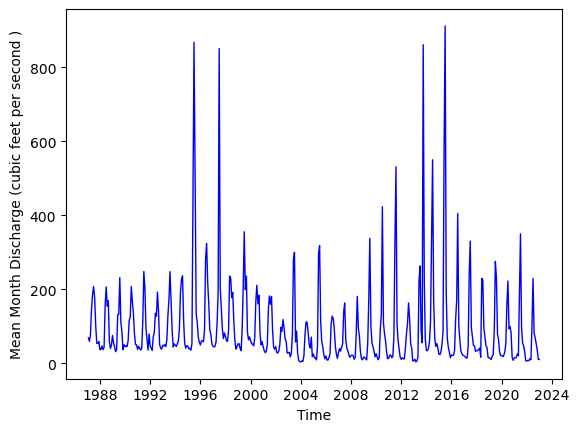

In [38]:
fig, ax = plt.subplots() # use this instead of `plt.figure` to get the axis (ax) object
ax.plot(monthly_discharge, label='Monthly Discharge',color='blue',linewidth=1)  # plot the sine wav
ax.set_xlabel('Time')
ax.set_ylabel('Mean Month Discharge (cubic feet per second )')
plt.show()  # show the plot


Pretty cool, huh?  What about if we wanted to see an annual average? 

In [39]:
annual_discharge = df.set_index('date').resample('1A').mean()
annual_discharge # annual values from 1987 to 2022!


,discharge
date,
1987-12-31,102.035616
1988-12-31,89.592896
1989-12-31,82.709589
1990-12-31,93.517808
1991-12-31,87.750685
1992-12-31,84.005464
1993-12-31,97.010959
1994-12-31,100.956164
1995-12-31,201.704110


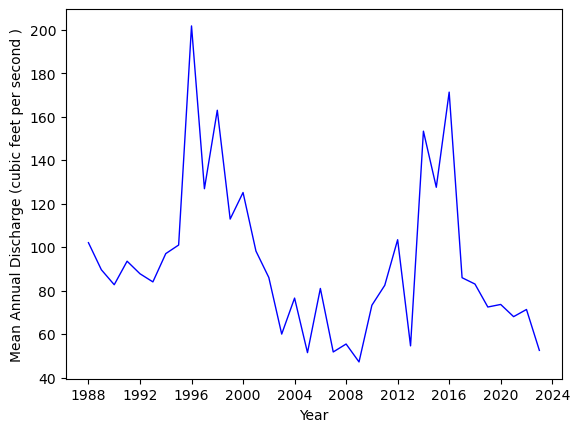

In [40]:
fig, ax = plt.subplots()  # use this instead of `plt.figure` to get the axis (ax) object
ax.plot(annual_discharge, label='Monthly Discharge',
        color='blue', linewidth=1)  # plot the sine wav
ax.set_xlabel('Year')
ax.set_ylabel('Mean Annual Discharge (cubic feet per second )')
plt.show()  # show the plot


Depending on our data, we'll be able to call on Pandas to get our data into Python, manipulate it according to column names or index values (including datatime), create temporal averages, and much more.  We'll continue to learn bits and pieces of Pandas functionality as we go along. 